<a href="https://colab.research.google.com/github/Aandhikads/Aandhikads/blob/main/datamining_Clustering_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

LOAD DATASETS

In [64]:
#Load Data From Local File
data=pd.read_csv("bpbd-od_17606_jml_kejadian_bencana_tanah_longsor__kabupatenkota_data.csv")

DATA UNDERSTANDING

In [65]:
#See the first 5 data
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_tanah_longsor,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,KEJADIAN,2012
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,48,KEJADIAN,2012
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,9,KEJADIAN,2012
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,12,KEJADIAN,2012
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,36,KEJADIAN,2012


In [66]:
#See the number of rows and number of colums of data
data.shape

(270, 8)

In [67]:
#Understanding each  variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    270 non-null    int64 
 1   kode_provinsi         270 non-null    int64 
 2   nama_provinsi         270 non-null    object
 3   kode_kabupaten_kota   270 non-null    int64 
 4   nama_kabupaten_kota   270 non-null    object
 5   jumlah_tanah_longsor  270 non-null    int64 
 6   satuan                270 non-null    object
 7   tahun                 270 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 17.0+ KB


In [68]:
#See a statistical summary of variable with numeric types
data.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_tanah_longsor,tahun
count,270.000000,270.0,270.000000,270.000000,270.000000
mean,135.500000,32.0,3231.333333,20.970370,2016.500000
std,78.086491,0.0,31.259794,37.892126,2.877615
min,1.000000,32.0,3201.000000,0.000000,2012.000000
25%,68.250000,32.0,3207.000000,1.000000,2014.000000
50%,135.500000,32.0,3214.000000,6.000000,2016.500000
75%,202.750000,32.0,3273.000000,27.000000,2019.000000
max,270.000000,32.0,3279.000000,354.000000,2021.000000


Data Cleaning and Preprocessing

Check Duplicate Data


In [69]:
#Drop duplicate value  
data=data.drop_duplicates()

In [70]:
#See changes in the number of rows and colums after the duplicate value
data.shape

(270, 8)

Check data types

In [71]:
#Check data types
data.dtypes

id                       int64
kode_provinsi            int64
nama_provinsi           object
kode_kabupaten_kota      int64
nama_kabupaten_kota     object
jumlah_tanah_longsor     int64
satuan                  object
tahun                    int64
dtype: object

In [72]:
#merubah niliai kosong dengan isi spasi menjadi NA
data["jumlah_tanah_longsor"]=data["jumlah_tanah_longsor"].replace("",np.nan)

In [73]:
#Merubah tipe data
data["jummlah_tanah_longsor"]=data["jumlah_tanah_longsor"].astype("float64")

In [74]:
data.dtypes

id                         int64
kode_provinsi              int64
nama_provinsi             object
kode_kabupaten_kota        int64
nama_kabupaten_kota       object
jumlah_tanah_longsor       int64
satuan                    object
tahun                      int64
jummlah_tanah_longsor    float64
dtype: object

CHECK MISSING VALUE

In [75]:
#Check the missing value
data.isnull().sum()

id                       0
kode_provinsi            0
nama_provinsi            0
kode_kabupaten_kota      0
nama_kabupaten_kota      0
jumlah_tanah_longsor     0
satuan                   0
tahun                    0
jummlah_tanah_longsor    0
dtype: int64

IMPUTE MISSING VALUE

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


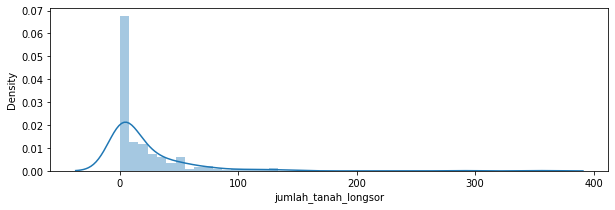

In [85]:
#look at the distribution of the totalcharges variable with histogram and destiny plot
plt.figure(figsize=(10,3))
sns.distplot(data["jumlah_tanah_longsor"])
plt.show()

In [84]:
#because the totalcharges variable has positive skewed, therefore the missing value is imputed with the median
fill=data["jumlah_tanah_longsor"].median()
data["jumlah_tanah_longsor"]=data["jumlah_tanah_longsor"].fillna(fill)

In [87]:
#check missing value after imputation
data.isnull().sum()

id                       0
kode_provinsi            0
nama_provinsi            0
kode_kabupaten_kota      0
nama_kabupaten_kota      0
jumlah_tanah_longsor     0
satuan                   0
tahun                    0
jummlah_tanah_longsor    0
dtype: int64

Outlier Detection

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


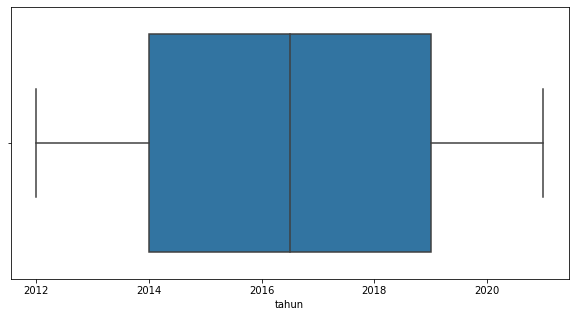

In [86]:
#check Outlier on Tenure variable
plt.figure(figsize=(10,5))
sns.boxplot(data["tahun"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

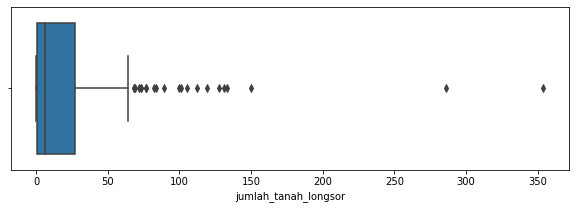

In [90]:
#check Outlier on the monthlycharges variable
plt.figure(figsize=(10,3))
sns.boxplot(data["jumlah_tanah_longsor"])
plt.show

In [91]:
#See Observation outliners onn the totalcharges variable
Q1=data["jumlah_tanah_longsor"].quantile(0.25)
Q3=data["tahun"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q2 + (1.5 *IQR)
data.loc[(data["jumlah_tanah_longsor"]>upper_range),:]

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_tanah_longsor,satuan,tahun,jummlah_tanah_longsor


In [92]:
#Replace outliner observations with upper bound and lower bound
data.loc[(data["jumlah_tanah_longsor"]>upper_range), "jumlah_tanah_longsor"]=upper_range

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


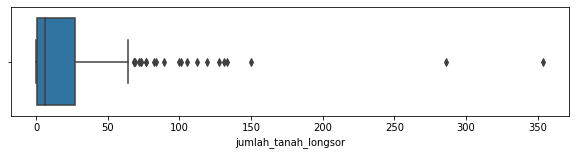

In [93]:
#check outlier on the totalcharges variable
plt.figure(figsize=(10,2))
sns.boxplot(data["jumlah_tanah_longsor"])
plt.show()

Handle Inconsistent Data

In [94]:
from pydoc import replace
#replace "No Internet Service with No"
replace_colsl = ['kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota']
for i in replace_colsl:
    data[i] = data[i].replace({'No internet service' : 'No'})

#Replace "No Phone service" with "No"
data["id"] =data['id'].replace({'No Phone Service' : 'No'})

Encoding Variables

In [95]:
from sklearn.preprocessing import LabelEncoder

#Separating Categorical and numerical columns
Id_col = ['id']
num_cols = ['jumlah_tanah_longsor']

#Biner category colums
bin_cols = ['kode_provinsi','kode_kabupaten_kota','satuan','tahun']

#Multi category colums
multi_cols=['nama_provinsi','nama_kabupaten_kota']

#Label encoding Biner category colums
le = LabelEncoder()
for i in bin_cols:
  data[i]=le.fit_transform(data[i])

#Label encoding for nominal multi category colums
data=pd.get_dummies(data=data,columns=multi_cols,drop_first=True)

In [50]:
data

,id,kode_provinsi,kode_kabupaten_kota,jumlah_tanah_longsor,satuan,tahun,jummlah_tanah_longsor,nama_kabupaten_kota_KABUPATEN BANDUNG BARAT,nama_kabupaten_kota_KABUPATEN BEKASI,nama_kabupaten_kota_KABUPATEN BOGOR,...,nama_kabupaten_kota_KABUPATEN TASIKMALAYA,nama_kabupaten_kota_KOTA BANDUNG,nama_kabupaten_kota_KOTA BANJAR,nama_kabupaten_kota_KOTA BEKASI,nama_kabupaten_kota_KOTA BOGOR,nama_kabupaten_kota_KOTA CIMAHI,nama_kabupaten_kota_KOTA CIREBON,nama_kabupaten_kota_KOTA DEPOK,nama_kabupaten_kota_KOTA SUKABUMI,nama_kabupaten_kota_KOTA TASIKMALAYA
0,1,0,0,0,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,48,0,0,48.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,2,9,0,0,9.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,3,12,0,0,12.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,4,36,0,0,36.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,266,0,22,2,0,9,2.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
266,267,0,23,2,0,9,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
267,268,0,24,3,0,9,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
268,269,0,25,2,0,9,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


DATA PARTITION

In [51]:
data=data.drop(labels="id",axis=1)

In [96]:
from sklearn.model_selection import train_test_split

##partitionn data into data training and data testing
train,test = train_test_split(data,test_size= 0.20,random_state=111)
##Seperating dependent and independent variables on training and testing data
train_X=train.drop(labels='id',axis=1)
train_Y=train['id']
test_X=test.drop(labels='id',axis=1)
test_Y= test['id']